---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Muhammed Efe Guler"
COLLABORATORS = ""

---

In [2]:
import numpy as np
import pandas as pd
import random

np.random.seed(0)
num_patients = 1000

ages = np.random.randint(20, 90, size=num_patients)
genders = np.random.choice(['Male', 'Female'], size=num_patients)
severities = np.random.choice(['Minor', 'Medium', 'Critical'], size=num_patients, p=[0.4, 0.3, 0.3])
previous_admissions = np.random.randint(0, 5, size=num_patients)

days_stayed = (
    3 +  
    (ages * 0.5) +  
    np.where(severities == 'Minor', 0, 0) + 
    np.where(severities == 'Medium', 5, 0) + 
    np.where(severities == 'Critical', 10, 0) + 
    (previous_admissions * 2) 
) + np.random.normal(0, 2, size=num_patients)

days_stayed = np.clip(np.round(days_stayed), 1, None)

df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Severity': severities,
    'Previous_Admissions': previous_admissions,
    'Days_Stayed': np.clip(days_stayed, 1, None)
})

print("Sample Data:\n", df.head(20))

Sample Data:
     Age  Gender  Severity  Previous_Admissions  Days_Stayed
0    64    Male  Critical                    4         52.0
1    67    Male     Minor                    4         45.0
2    84  Female     Minor                    2         49.0
3    87    Male  Critical                    0         54.0
4    87    Male     Minor                    2         47.0
5    29    Male  Critical                    2         35.0
6    41  Female  Critical                    4         42.0
7    56    Male    Medium                    0         40.0
8    32    Male     Minor                    4         26.0
9    78    Male  Critical                    3         58.0
10   85    Male    Medium                    4         59.0
11   59    Male     Minor                    4         36.0
12   66    Male    Medium                    0         42.0
13   57    Male    Medium                    4         44.0
14   45    Male  Critical                    4         42.0
15   29    Male    Medium 

In [3]:
missing_percentage_days_stayed = 0.03 
missing_indices = np.random.choice(df.index, int(len(df) * missing_percentage_days_stayed), replace=False)
df.loc[missing_indices, 'Days_Stayed'] = np.nan

missing_percentage_age = 0.05
missing_indices_age = np.random.choice(df.index, int(len(df) * missing_percentage_age), replace=False)
df.loc[missing_indices_age, 'Age'] = np.nan

print("Data with Missing Values:\n", df.head(30))

Data with Missing Values:
      Age  Gender  Severity  Previous_Admissions  Days_Stayed
0    NaN    Male  Critical                    4         52.0
1   67.0    Male     Minor                    4         45.0
2   84.0  Female     Minor                    2         49.0
3   87.0    Male  Critical                    0         54.0
4   87.0    Male     Minor                    2         47.0
5   29.0    Male  Critical                    2         35.0
6   41.0  Female  Critical                    4         42.0
7   56.0    Male    Medium                    0         40.0
8   32.0    Male     Minor                    4         26.0
9   78.0    Male  Critical                    3         58.0
10  85.0    Male    Medium                    4         59.0
11  59.0    Male     Minor                    4         36.0
12  66.0    Male    Medium                    0         42.0
13  57.0    Male    Medium                    4         44.0
14  45.0    Male  Critical                    4         42

In [4]:
df['Days_Stayed'] = df['Days_Stayed'].fillna(int(df['Days_Stayed'].mean()))
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
print(df.head(20))

     Age  Gender  Severity  Previous_Admissions  Days_Stayed
0   53.0    Male  Critical                    4         52.0
1   67.0    Male     Minor                    4         45.0
2   84.0  Female     Minor                    2         49.0
3   87.0    Male  Critical                    0         54.0
4   87.0    Male     Minor                    2         47.0
5   29.0    Male  Critical                    2         35.0
6   41.0  Female  Critical                    4         42.0
7   56.0    Male    Medium                    0         40.0
8   32.0    Male     Minor                    4         26.0
9   78.0    Male  Critical                    3         58.0
10  85.0    Male    Medium                    4         59.0
11  59.0    Male     Minor                    4         36.0
12  66.0    Male    Medium                    0         42.0
13  57.0    Male    Medium                    4         44.0
14  45.0    Male  Critical                    4         42.0
15  29.0    Male    Medi

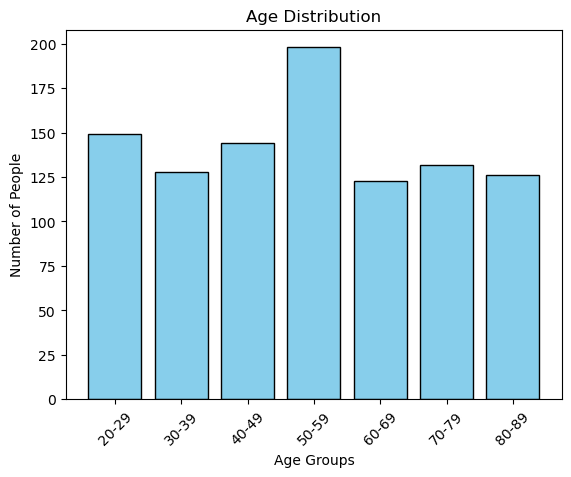

In [5]:
import matplotlib.pyplot as plt

age_groups = range(20, 100, 10)
age_labels = [f'{i}-{i+9}' for i in age_groups[:-1]]
df['Age_Group'] = pd.cut(df['Age'], bins=age_groups, labels=age_labels, right=False)
age_group_counts = df['Age_Group'].value_counts(sort=False)

plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.show()

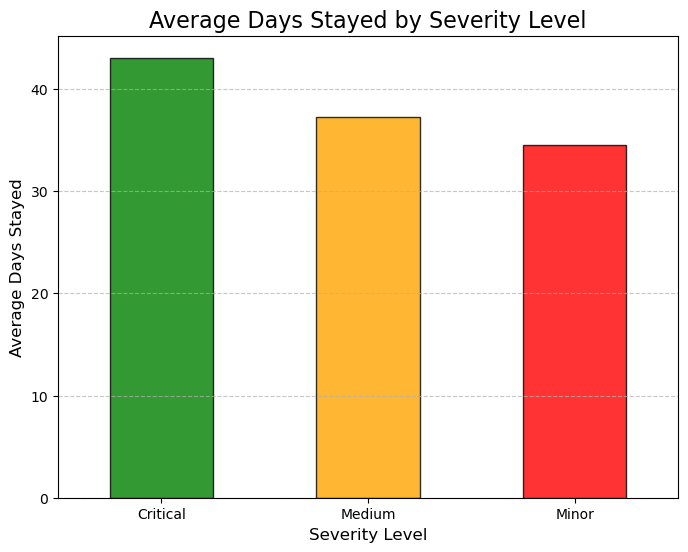

In [6]:
severity_means = df.groupby('Severity')['Days_Stayed'].mean()
plt.figure(figsize=(8, 6))
severity_means.plot(kind='bar', color=['green', 'orange', 'red'], edgecolor='black', alpha=0.8)
plt.title('Average Days Stayed by Severity Level', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Average Days Stayed', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Days_Stayed'], alpha=0.6, color='red', edgecolor='k')
plt.title('Days Stayed vs Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Days Stayed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoded_columns = ['Severity']
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(df[encoded_columns])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoded_columns))
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.drop(columns=encoded_columns, inplace=True)

print(df_encoded.head(10))

    Age  Gender  Previous_Admissions  Days_Stayed Age_Group  \
0  53.0    Male                    4         52.0     50-59   
1  67.0    Male                    4         45.0     60-69   
2  84.0  Female                    2         49.0     80-89   
3  87.0    Male                    0         54.0     80-89   
4  87.0    Male                    2         47.0     80-89   
5  29.0    Male                    2         35.0     20-29   
6  41.0  Female                    4         42.0     40-49   
7  56.0    Male                    0         40.0     50-59   
8  32.0    Male                    4         26.0     30-39   
9  78.0    Male                    3         58.0     70-79   

   Severity_Critical  Severity_Medium  Severity_Minor  
0                1.0              0.0             0.0  
1                0.0              0.0             1.0  
2                0.0              0.0             1.0  
3                1.0              0.0             0.0  
4                0.0      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded[['Age', 'Previous_Admissions', 'Severity_Minor', 'Severity_Medium', 'Severity_Critical']]
y = df_encoded['Days_Stayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = linear_model.intercept_

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Model Intercept: {intercept:.2f}")

Mean Squared Error: 10.52
R-squared: 0.92
Model Intercept: 8.40


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Days Stayed', fontsize=16)
plt.xlabel('Days Stayed', fontsize=12)
plt.ylabel('Predicted Days Stayed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()